Imports required for full analysis

In [1]:
import csv
from csv import writer
from csv import reader
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

Creating a dictionary with the Point Shares data for each draft pick and their associated year/position

In [7]:
dictYearPoints={} #Point-Shares Dictionary for all positions in a given year
dictPositionPoints={} #Point-Shares Dictionary for all position/year combinations 

with open('Drafted_Players_2010-1980.csv', 'r') as f:
      reader = csv.reader(f)
      f.readline()
      count=0
      lForwards=[]
      lDefence=[]
      lGoalie=[]
      lDuplicates=[]
      draftPos=[]
      for row in reader:
        if row not in lDuplicates: 
          count=0
          lDuplicates.append(row)
          draftPos.append(int(row[0]))
          if (int(row[1]),row[3]) in dictPositionPoints: #If the (year, position) key is already in the dictionary
            if row[3]=='F': #Seperates forwards into a seperate list
              lForwards.append(int(row[0]))
            elif row[3]=='D': #Seperates defenseman into a seperate list
              lDefence.append(int(row[0]))
            elif row[3]=='G': #Seperates goalies into a seperate list
              lGoalie.append(int(row[0]))
            try:
              dictPositionPoints[(int(row[1]),row[3])].append(float(row[5])) #Associate the year and position with the point-shares for a specific draft pick
            except:
              dictPositionPoints[(int(row[1]),row[3])].append(0) #If it is not given, player given the value 0
          else:
            if row[3]=='F': #Same as above
              lForwards.append(int(row[0]))
            elif row[3]=='D':
              lDefence.append(int(row[0]))
            elif row[3]=='G':
              lGoalie.append(int(row[0]))
            try:
              dictPositionPoints[(int(row[1]),row[3])]=[float(row[5])] #Since this combination of year and position not defined in the points dictionary, create a new key
            except:
              dictPositionPoints[(int(row[1]),row[3])]=[0]
          if int(row[1]) in dictYearPoints: #If the year is given as a key in dictYearPoints, add the next Point-shares for the draft picks
            try:
              dictYearPoints[int(row[1])].append(float(row[5]))
            except:
              dictYearPoints[int(row[1])].append(0) #If it's not given, add the value 0
          else:
            dictYearPoints[int(row[1])]=[float(row[5])]
        else:
          count+=1
          dictYearPoints[int(row[1])].append(0)
          draftPos.append(int(row[0])+count) #Keep track of the associated draft position for each player
        
print(draftPos)
print(len(dictYearPoints[2010]))
print(dictYearPoints)
print(dictPositionPoints)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17

Normalizing the Point Shares for each draft year between 0 and 1 for the Weibull Distribution parameters

In [8]:
lNormalized=[]
for i in dictYearPoints:
  normalizedList=[]
  amin, amax = min(dictYearPoints[i]), max(dictYearPoints[i]) 
  for i, val in enumerate(dictYearPoints[i]): #Takes maximum and minimum Point-Shares from the list and normalizes each value
    normalizedList.append((val-amin)/(amax-amin))
  lNormalized.append(normalizedList)
print(lNormalized)

[[0.8494492044063648, 1.0, 0.16768665850673195, 0.5813953488372093, 0.4712362301101591, 0.25581395348837205, 0.7001223990208078, 0.07711138310893513, 0.4687882496940024, 0.04039167686658506, 0.20807833537331702, 0.6842105263157894, 0.03182374541003671, 0.5667074663402693, 0.22521419828641367, 0.7429620563035495, 0.01835985312117503, 0.09547123623011017, 0.2827417380660954, 0.0869033047735618, 0.15667074663402694, 0.03671970624235006, 0.2545899632802937, 0.41003671970624234, 0.02692778457772338, 0.5667074663402693, 0.019583843329253364, 0.37943696450428394, 0.05997552019583843, 0.4638922888616891, 0.11995104039167687, 0.017135862913096694, 0.015911872705018357, 0.017135862913096694, 0.017135862913096694, 0.12851897184822522, 0.6731946144430845, 0.20685434516523865, 0.017135862913096694, 0.017135862913096694, 0.19461444308445533, 0.0893512851897185, 0.017135862913096694, 0.017135862913096694, 0.20318237454100363, 0.09791921664626682, 0.5654834761321909, 0.017135862913096694, 0.2044063647

Plots normalized Point Shares for all draft classes

Text(0, 0.5, 'Pick Value')

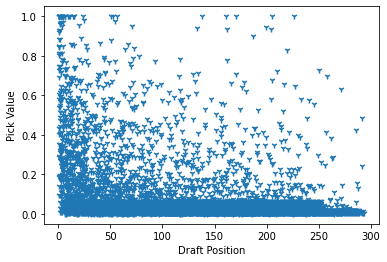

In [12]:
newLNormalized=sum(lNormalized,[])

plt.scatter(draftPos,newLNormalized,marker="1") #draftPos includes the draft picks for every year in order, and newLNormalized is the sum lists together
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

With the data above, find the average Point Shares value of each draft pick

In [13]:
numberPickList=[]
for i in lNormalized:
  exampleList=list(range(1,len(i)+1))
  numberPickList.append(exampleList)
newNumberPickList=sum(numberPickList,[]) #Includes all draft pick values for each list in lNormalized

import statistics
dictPerPick={} #dictPerPick includes the list of Point Shares value for each draft pick taken
for i in range(len(newNumberPickList)): 
  if newNumberPickList[i] in dictPerPick:
    dictPerPick[newNumberPickList[i]].append(newLNormalized[i]) #for each draft pick, add the Point-Shares value to the list of normalized values
  else:
    dictPerPick[newNumberPickList[i]]=[newLNormalized[i]]

avgValuePerPick=[]
for i in dictPerPick:
  avgValuePerPick.append(statistics.mean(dictPerPick[i])) #For each list of Point Shares, find the average value per draft pick

print(avgValuePerPick)


[0.6356289924647872, 0.5398443775919896, 0.3833272807091401, 0.38506166847518997, 0.38002561539678265, 0.31623752317146403, 0.28292155598071994, 0.1830022230900474, 0.2434914301361375, 0.17041853294319695, 0.280887569362191, 0.2425544444406465, 0.24876632773510593, 0.2391324706261107, 0.1735540327978376, 0.1704480323239455, 0.15327851750620253, 0.14201606359663643, 0.16110228452872377, 0.1498432265169421, 0.14616521427632434, 0.17290597237342742, 0.14865981085243327, 0.19221804822309413, 0.1367998383077696, 0.16520277216955237, 0.17794825386991084, 0.14469396761712527, 0.1232214077854295, 0.08829215041153868, 0.0723153059852885, 0.08746964073502908, 0.098799631421865, 0.06731496252520612, 0.09587288417932839, 0.1033702848990541, 0.0801458390570489, 0.1326546471640613, 0.07156754990326882, 0.13642160350411928, 0.06270216901518882, 0.053205452276901884, 0.10805375722758352, 0.1661042530772893, 0.12990475272967936, 0.0790703806791685, 0.09726157851536628, 0.05345433827944149, 0.1024972355

Renormalize the draft values between 0 and 1

In [17]:
amin, amax = min(avgValuePerPick), max(avgValuePerPick)
updatedNormalized=[]
for i, val in enumerate(avgValuePerPick): 
  updatedNormalized.append((val-amin)/(amax-amin))

print(updatedNormalized)

[1.0, 0.8479348019959285, 0.5994522731459614, 0.6022057426818619, 0.5942106339731823, 0.49294229471612505, 0.44005071965174153, 0.28142134936474006, 0.3774524631170723, 0.2614438056188693, 0.4368216146613943, 0.3759649286575869, 0.38582675526099924, 0.3705322907922765, 0.2664216447725879, 0.26149063807918127, 0.23423275669748767, 0.21635277371646014, 0.24665356856792608, 0.22877897682712722, 0.2229398589231331, 0.26539280066346443, 0.22690021646896702, 0.29605215698962556, 0.20807162822729405, 0.2531633975821568, 0.2733977974489427, 0.22060414545974397, 0.1865148601731943, 0.13106206698976283, 0.10569763853343513, 0.12975627172206983, 0.1477434743585893, 0.09775922149897114, 0.14309704549801253, 0.15499972659638106, 0.11812919201011819, 0.20149082907839297, 0.1045105201551645, 0.2074711523535277, 0.09043606882581795, 0.07535932489242132, 0.1624350871491192, 0.2545945655511876, 0.19712516720033554, 0.11642182187145131, 0.1453017010103531, 0.07575444992692597, 0.15361369590088206, 0.0968

Plot the above normalized list versus draft position

Text(0, 0.5, 'Pick Value')

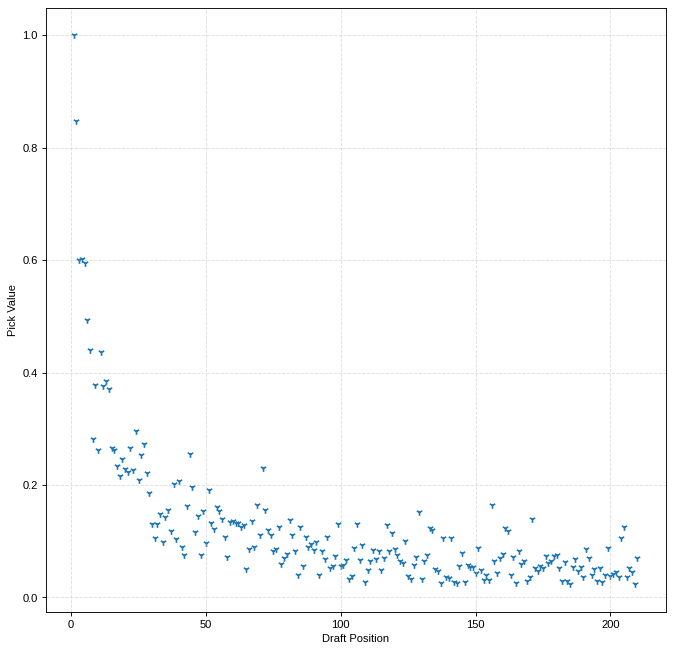

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
xList=list(range(1,291))
plt.scatter(xList[0:210],updatedNormalized[0:210], marker="1") #Plot the normalized Point Shares value for each draft pick versus draft position
plt.style.use('seaborn-whitegrid')
plt.grid(alpha=.4,linestyle='--')
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

Repeat above analysis on forwards only

In [19]:
lForwardNormalized=[]
for i in dictPositionPoints:
  if i[1]=="F":
    normalizedForwardList=[]
    amin, amax = min(dictPositionPoints[i]), max(dictPositionPoints[i]) #Normalization for forward Point-Shares
    for i, val in enumerate(dictPositionPoints[i]):
      normalizedForwardList.append((val-amin)/(amax-amin))
    lForwardNormalized.append(normalizedForwardList)

print(dictPositionPoints)
print(lForwardNormalized)

fPointShares=[]
dPointShares=[]
gPointShares=[]
for i in dictPositionPoints: #Seperation of Point Shares for every draft position and associated player position
  if i[1]=='F':
    for j in dictPositionPoints[i]:
      fPointShares.append(j)
  elif i[1]=='D':
    for j in dictPositionPoints[i]:
      dPointShares.append(j)
  else:
    for j in dictPositionPoints[i]:
      gPointShares.append(j)

print(statistics.mean(fPointShares)) #Statistics on forward, defenseman, and goalie point-shares
print(statistics.median(fPointShares))
print(max(fPointShares))
print(statistics.stdev(fPointShares))
print(statistics.mean(dPointShares))
print(statistics.median(dPointShares))
print(max(dPointShares))
print(statistics.stdev(dPointShares))
print(statistics.mean(gPointShares))
print(statistics.median(gPointShares))
print(max(gPointShares))
print(statistics.stdev(gPointShares))


{(2010, 'F'): [68.0, 80.3, 46.1, 37.1, 19.5, 55.8, 4.9, 36.9, 44.9, 59.3, 0.1, 6.4, 21.7, 5.7, 11.4, 32.1, 0.8, 44.9, 29.6, 3.5, 36.5, 8.4, 0, -0.1, 0.0, 0, 0.0, 0.0, 5.9, 0, 0, 15.2, 44.8, 0.0, 1.3, 21.6, 0, 0.2, 5.2, 7.8, 31.5, 0, 1.9, 0.0, 0, 0, 4.9, 1.8, 0, 0, 0, 0, 0, 23.4, 0, 0, 0.3, 0, -1.4, 1.5, -0.2, 0, 18.9, 0, 0, 0.0, 4.5, -0.1, 3.2, 2.6, 0, 1.3, 0, 2.5, 19.5, 0, 0, -0.4, 0, 13.1, 0, 0.3, 0, 1.9, 0, 0, 0.8, 0, 46.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.1, 0, 0.8, 53.3, 0, 0, 0, 0, 0, -0.1, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0.0], (2010, 'D'): [12.3, 1.9, 54.5, 1.2, 17.0, 1.6, 19.4, 9.1, 53.6, 15.5, 14.5, 6.6, 0.0, 8.0, 6.9, 0, 26.4, 0.1, 0, 0, 0, 0, 0, 0, 0.4, 0, 0, 0, 0, 0, -0.2, 2.6, 0, 0, 0, 0.9, 0.0, 0.0, 0, 0, 53.7, 5.0, 0, 0, 0, 3.3, 0, 7.5, 0, 0, 0, 4.3, 0, 0, 4.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.9], (2010, 'G'): [15.6, 0.2, 15.3, -0.1, 5.6, 0, 0, 0.1, 39.1, -0.2, 0, 19.5, 41.9, 0, 0, 0, 0, 0, 0, 72.3, 0], (2009, 'F'): [96.4, 62.2, 56.4, 49.4, 45.8, 0.0, 7.7, 15.2, 

Plotting normalized Point Shares for forwards against draft position

Text(0, 0.5, 'Pick Value')

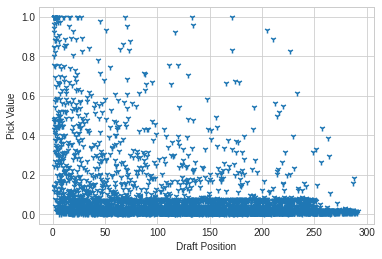

In [23]:
newLForwardNormalized=sum(lForwardNormalized,[])

plt.scatter(lForwards,newLForwardNormalized,marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

Repeated Point Shares Analysis on Forwards

In [25]:
import statistics
dictPerForwardPick={}
for i in range(len(lForwards)):
  if lForwards[i] in dictPerForwardPick:
    dictPerForwardPick[lForwards[i]].append(newLForwardNormalized[i]) #Adds to normalized list of forward Point Shares for each draft pick
  else:
    dictPerForwardPick[lForwards[i]]=[newLForwardNormalized[i]]

print(dictPerForwardPick)
avgValuePerForwardPick=[]
checkPick=[]
xForwardList=[]
counter=0
countNum=0

while counter<300:
  avgValuePerForwardPick.append(0)
  checkPick.append(0)
  counter+=1

for i in dictPerForwardPick:
  avgValuePerForwardPick[i-1]=statistics.mean(dictPerForwardPick[i]) #Take average Point Shares for each draft pick value
  checkPick[i-1]=1

for i in range(len(checkPick)): #Checks for any draft picks which do not have an associated Point-Shares (no forwards drafted at that poisition)
  if checkPick[i]==1:
    xForwardList.append(i+1)
  else:
    avgValuePerForwardPick.pop(i-countNum)
    countNum+=1


{1: [0.8494492044063648, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9627272727272728, 0.11631663974151857, 0.9217777777777778, 1.0, 0.24434389140271492, 0.9416590701914311, 0.43340857787810383, 1.0, 0.8466703973139339, 0.8034037558685446, 0.4827890556045895, 0.47307692307692306, 1.0, 0.13873159682899208, 0.7549277266754271, 0.14603960396039603], 2: [1.0, 0.48853754940711464, 0.5717035611164581, 0.4073846153846154, 0.7502793296089386, 1.0, 1.0, 0.8817598533455546, 1.0, 0.5431111111111111, 0.8227771010962242, 1.0, 0.31376975169300225, 0.04232804232804232, 0.4459988808058198, 0.8838028169014084, 0.4721977052074139, 0.37846153846153846, 0.4149738827626233, 0.2706681766704417, 0.6929368029739776, 0.076215505913272], 4: [0.5813953488372093, 0.5889003083247687, 1.0, 0.19938461538461538, 0.3396648044692737, 0.2532523850823938, 0.38636363636363635, 0.024232633279483037, 0.015037593984962405, 0.10370835952231301, 0.01975128017556694, 1.0, 0.1345707656612529, 0.2401805869074492, 0.40013227513227506, 0.11583

Plots average draft value for forwards

Text(0, 0.5, 'Pick Value')

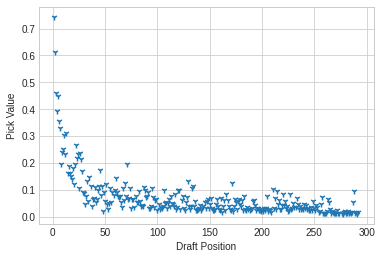

In [26]:
plt.scatter(xForwardList,avgValuePerForwardPick,marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

Renormalizes average value to between 0 and 1 for Weibull Distribution parameters

In [28]:
amin, amax = min(avgValuePerForwardPick), max(avgValuePerForwardPick)
updatedForwardNormalized=[]
for i, val in enumerate(avgValuePerForwardPick):
  updatedForwardNormalized.append((val-amin)/(amax-amin))

print(updatedForwardNormalized)

[1.0, 0.8199602553841537, 0.6141234312766555, 0.5237099114746273, 0.5967703568637803, 0.47169936336753443, 0.4352534164168123, 0.25329313322799735, 0.31775431943852667, 0.3287123487882098, 0.40339936788388053, 0.30697008700806055, 0.41402177740708473, 0.20900608190840517, 0.24539842979873402, 0.2115663519878196, 0.19379698072169504, 0.18061793371688628, 0.23360278531885414, 0.15573904862298468, 0.25703704401147964, 0.3496941423183858, 0.2839071244105711, 0.3059910106777886, 0.13205728678182405, 0.3095442235138384, 0.2808377302337247, 0.21816857473859233, 0.11266425273848878, 0.10856946139453107, 0.05269247365349051, 0.09517464039410552, 0.16847823765914538, 0.07029232977224424, 0.18792578399911256, 0.145146136175943, 0.0414805547859336, 0.07890243639778327, 0.08185571030113196, 0.13713642076781818, 0.06271700232641114, 0.07714068641531656, 0.12405772966267978, 0.14198705800432107, 0.2254769829723161, 0.09798703514649615, 0.14433868425573104, 0.01705239685669376, 0.1142529194472753, 0.0

Plots normalized forward Point Shares data

Text(0, 0.5, 'Pick Value')

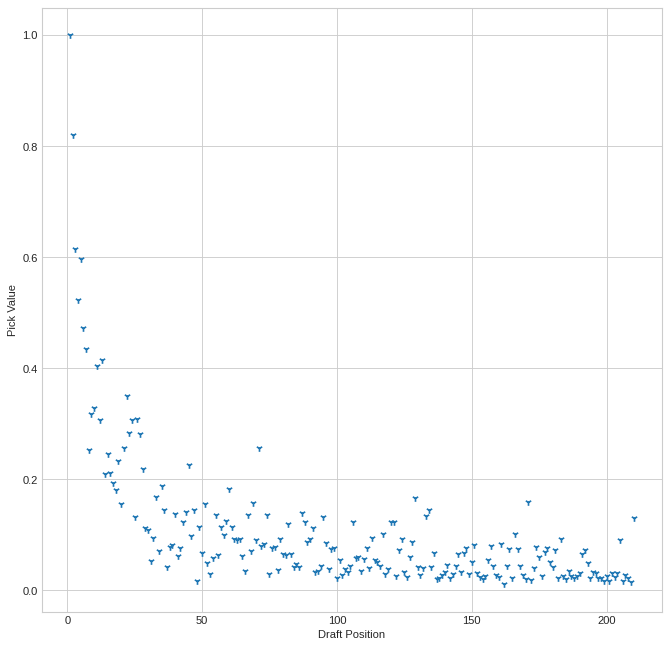

In [29]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(xForwardList[0:210],updatedForwardNormalized[0:210],marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

Repeated analysis for defensemen

In [30]:
lDefenceNormalized=[]
for i in dictPositionPoints:
  if i[1]=="D":
    normalizedDefenceList=[]
    amin, amax = min(dictPositionPoints[i]), max(dictPositionPoints[i])
    for i, val in enumerate(dictPositionPoints[i]):
      normalizedDefenceList.append((val-amin)/(amax-amin))
    lDefenceNormalized.append(normalizedDefenceList)
print(lDefenceNormalized)

[[0.22851919561243142, 0.038391224862888484, 1.0, 0.02559414990859232, 0.31444241316270566, 0.03290676416819013, 0.35831809872029247, 0.17001828153564896, 0.9835466179159049, 0.2870201096892139, 0.26873857404021934, 0.1243144424131627, 0.003656307129798903, 0.14990859232175502, 0.12979890310786107, 0.003656307129798903, 0.486288848263254, 0.005484460694698355, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.01096892138939671, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.0, 0.051188299817184646, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.02010968921389397, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.9853747714808044, 0.09506398537477148, 0.003656307129798903, 0.003656307129798903, 0.003656307129798903, 0.06398537477148081, 0.003656307129798903, 0.14076782449725778, 0

2532


Text(0, 0.5, 'Pick Value')

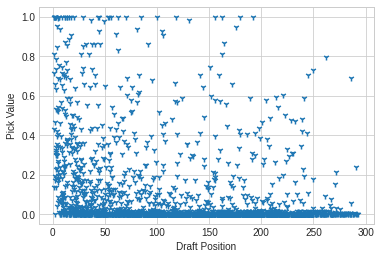

In [31]:
newDefenceNormalized=sum(lDefenceNormalized,[])
print(len(newDefenceNormalized))
plt.scatter(lDefence,newDefenceNormalized,marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

In [32]:
import statistics

dictPerDefencePick={}
for i in range(len(lDefence)):
  if lDefence[i] in dictPerDefencePick:
    dictPerDefencePick[lDefence[i]].append(newDefenceNormalized[i])
  else:
    dictPerDefencePick[lDefence[i]]=[newDefenceNormalized[i]]

print(dictPerDefencePick)

avgValuePerDefencePick=[]
checkPick=[]
xDefenceList=[]
counter=0
countNum=0
while counter<300:
  avgValuePerDefencePick.append(0)
  checkPick.append(0)
  counter+=1
for i in dictPerDefencePick:
  avgValuePerDefencePick[i-1]=statistics.mean(dictPerDefencePick[i])
  checkPick[i-1]=1
for i in range(len(checkPick)):
  if checkPick[i]==1:
    xDefenceList.append(i+1)
  else:
    avgValuePerDefencePick.pop(i-countNum)
    countNum+=1

print(avgValuePerDefencePick)

{3: [0.22851919561243142, 0.3154981549815498, 0.5336734693877551, 0.182883939038687, 0.7353982300884955, 0.635666347075743, 0.30503144654088055, 0.30196629213483145, 1.0, 0.33882352941176475, 0.7838855421686746, 0.32389937106918243, 0.1399297423887588], 10: [0.038391224862888484, 0.07701863354037267, 0.019387755102040816, 0.0082063305978898, 0.11252653927813162, 0.05679287305122494, 0.021753460777851025, 0.09859154929577466, 0.21402483564645727, 0.10542168674698794, 0.0, 0.21732444900051257], 12: [1.0, 0.24582869855394887, 0.5304428044280443, 0.8720496894409938, 0.5081632653061224, 0.005861664712778429, 0.1415929203539823, 1.0, 0.3633762517882689, 0.05915100904662492, 0.009411764705882352, 0.09016393442622953, 0.0860677783754707], 13: [0.02559414990859232, 0.0018450184501845018, 0.693012600229095, 0.4957152274225445, 0.772300469483568, 0.0007304601899196494, 0.00047192071731949034, 0.05346385542168674, 0.0, 0.2476580796252928, 0.009738595592004101], 15: [0.31444241316270566, 0.88837638

In [33]:
amin, amax = min(avgValuePerDefencePick), max(avgValuePerDefencePick)
updatedDefenceNormalized=[]
for i, val in enumerate(avgValuePerDefencePick):
  updatedDefenceNormalized.append((val-amin)/(amax-amin))

print(updatedDefenceNormalized)

[1.0, 0.8245381660606729, 0.6569277211846782, 0.6421277570180062, 0.5181490960616129, 0.7393486997278206, 0.4790276113594788, 0.2883651845506725, 0.5494939891754547, 0.11843807420052938, 0.48499594771366444, 0.5539577679227231, 0.3066106471058341, 0.7291501370121765, 0.3724817889431433, 0.34276180492915437, 0.5898556779039532, 0.3377439313980517, 0.2584292445857571, 0.2624012314002368, 0.25146668155906393, 0.10760930636378227, 0.331948274398068, 0.11738428811264766, 0.21492351541648524, 0.105295148203283, 0.29242722126490783, 0.17517349593606987, 0.3970929229706387, 0.13661182115499682, 0.015128010692424487, 0.22687839677696217, 0.12070885970286283, 0.01802999969521923, 0.10687108708499876, 0.2456771095902206, 0.18963305324088842, 0.4177082082907242, 0.1250187111959091, 0.35999515251338365, 0.03481306292689921, 0.10047865265208197, 0.2460780844542555, 0.40288079160350054, 0.17421874437290286, 0.04413670529944876, 0.18631821535427906, 0.09962228002392157, 0.21084195275373677, 0.15299659

291


Text(0, 0.5, 'Pick Value')

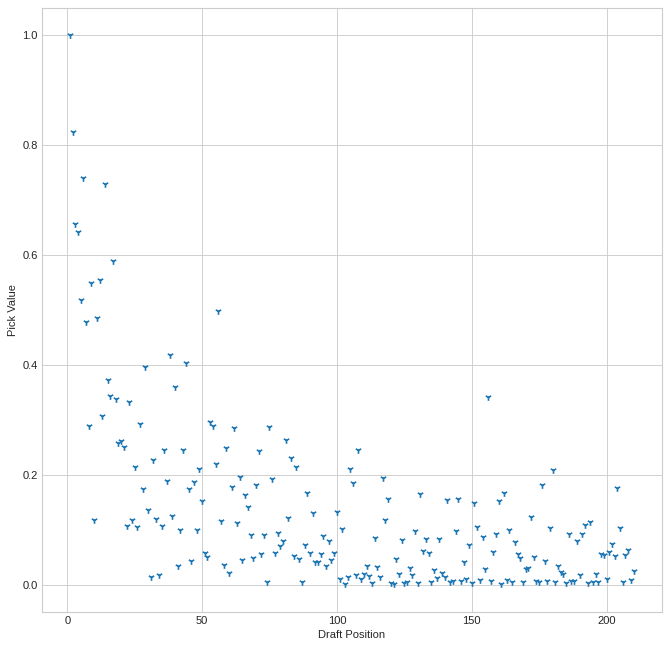

In [34]:
new=range(1,301)
figure(figsize=(10, 10), dpi=80)
print(len(updatedDefenceNormalized))
plt.scatter(xDefenceList[0:210],updatedDefenceNormalized[0:210],marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

Repeated analysis for goalies

In [35]:
lGoalieNormalized=[]
for i in dictPositionPoints:
  if i[1]=="G":
    normalizedGoalieList=[]
    amin, amax = min(dictPositionPoints[i]), max(dictPositionPoints[i])
    for i, val in enumerate(dictPositionPoints[i]):
      normalizedGoalieList.append((val-amin)/(amax-amin))
    lGoalieNormalized.append(normalizedGoalieList)
print(lGoalieNormalized)

[[0.2179310344827586, 0.005517241379310345, 0.21379310344827587, 0.0013793103448275863, 0.08, 0.0027586206896551726, 0.0027586206896551726, 0.00413793103448276, 0.5420689655172415, 0.0, 0.0027586206896551726, 0.27172413793103445, 0.5806896551724138, 0.0027586206896551726, 0.0027586206896551726, 0.0027586206896551726, 0.0027586206896551726, 0.0027586206896551726, 0.0027586206896551726, 1.0, 0.0027586206896551726], [0.3075709779179811, 1.0, 0.3974763406940063, 0.0, 0.056782334384858045, 0.0, 0.0, 0.05520504731861199, 0.00473186119873817, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6703470031545742, 0.0, 0.0, 0.06309148264984227, 0.0, 0.0], [0.002290950744558992, 0.5910652920962199, 0.5647193585337916, 0.002290950744558992, 0.002290950744558992, 0.20847651775486828, 0.002290950744558992, 0.002290950744558992, 1.0, 0.019473081328751432, 0.002290950744558992, 0.07674684994272624, 0.07101947308132875, 0.0034364261168384888, 0.002290950744558992, 0.002290950744558992, 0.0034364261168384888, 0.00229095074

768


Text(0, 0.5, 'Pick Value')

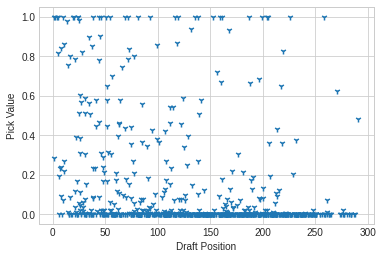

In [36]:
newGoalieNormalized=sum(lGoalieNormalized,[])
print(len(newGoalieNormalized))
plt.scatter(lGoalie,newGoalieNormalized,marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

In [37]:
import statistics
dictPerGoaliePick={}
for i in range(len(lGoalie)):
  #print(lForwards[i])
  if lGoalie[i] in dictPerGoaliePick:
    dictPerGoaliePick[lGoalie[i]].append(newGoalieNormalized[i])
  else:
    dictPerGoaliePick[lGoalie[i]]=[newGoalieNormalized[i]]

#print(dictPerForwardPick)

avgValuePerGoaliePick=[]
checkPick=[]
xGoalieList=[]
counter=0
countDumb=0
while counter<300:
  avgValuePerGoaliePick.append(0)
  checkPick.append(0)
  counter+=1
for i in dictPerGoaliePick:
  avgValuePerGoaliePick[i-1]=statistics.mean(dictPerGoaliePick[i])
  checkPick[i-1]=1
for i in range(len(checkPick)):
  if checkPick[i]==1:
    xGoalieList.append(i+1)
  else:
    avgValuePerGoaliePick.pop(i-countDumb)
    countDumb+=1

print(avgValuePerGoaliePick)

[0.6426512968299711, 1.0, 1.0, 0.9075255102040816, 0.09735454057893594, 0.23330990864371048, 0.39032159892049917, 0.0, 0.5363554757630161, 0.4508665576691461, 0.9791099000908264, 0.38560641802323886, 0.0, 0.4434121411379037, 0.0, 0.002290950744558992, 1.0, 1.0, 0.23573242422263177, 0.20342689242348957, 0.05682277635529974, 0.6674318947046219, 0.5174975601587481, 0.24825614732044438, 0.19203265544597187, 0.8238195912614518, 0.0382154114392114, 0.0, 0.24997796500264263, 0.03889160939765169, 0.2935120129009334, 0.5081833060556464, 0.007660183863635272, 0.4263133051696061, 0.2350224417103247, 0.23699802501645822, 0.342273431578834, 0.017650025214321734, 0.584711580423821, 0.3028483366578334, 0.44305764855361524, 0.0, 0.12038478973280968, 0.05873928115307426, 0.0020366598778004076, 0.5, 0.3696356915132182, 0.10553410553410554, 0.3621351068159579, 0.11018970069815105, 0.23409097054926345, 0.0019305019305019308, 0.012948471465299106, 0.001007850492386575, 0.1272759767096608, 0.061348263711949

In [38]:
amin, amax = min(avgValuePerGoaliePick), max(avgValuePerGoaliePick)
updatedGoalieNormalized=[]
for i, val in enumerate(avgValuePerGoaliePick):
  updatedGoalieNormalized.append((val-amin)/(amax-amin))

print(updatedGoalieNormalized)

[0.6426512968299711, 1.0, 1.0, 0.9075255102040816, 0.09735454057893594, 0.23330990864371048, 0.39032159892049917, 0.0, 0.5363554757630161, 0.4508665576691461, 0.9791099000908264, 0.38560641802323886, 0.0, 0.4434121411379037, 0.0, 0.002290950744558992, 1.0, 1.0, 0.23573242422263177, 0.20342689242348957, 0.05682277635529974, 0.6674318947046219, 0.5174975601587481, 0.24825614732044438, 0.19203265544597187, 0.8238195912614518, 0.0382154114392114, 0.0, 0.24997796500264263, 0.03889160939765169, 0.2935120129009334, 0.5081833060556464, 0.007660183863635272, 0.4263133051696061, 0.2350224417103247, 0.23699802501645822, 0.342273431578834, 0.017650025214321734, 0.584711580423821, 0.3028483366578334, 0.44305764855361524, 0.0, 0.12038478973280968, 0.05873928115307426, 0.0020366598778004076, 0.5, 0.3696356915132182, 0.10553410553410554, 0.3621351068159579, 0.11018970069815105, 0.23409097054926345, 0.0019305019305019308, 0.012948471465299106, 0.001007850492386575, 0.1272759767096608, 0.061348263711949

[0.6426512968299711, 1.0, 1.0, 0.9075255102040816, 0.09735454057893594, 0.23330990864371048, 0.39032159892049917, 0.0, 0.5363554757630161, 0.4508665576691461, 0.9791099000908264, 0.38560641802323886, 0.0, 0.4434121411379037, 0.0, 0.002290950744558992, 1.0, 1.0, 0.23573242422263177, 0.20342689242348957, 0.05682277635529974, 0.6674318947046219, 0.5174975601587481, 0.24825614732044438, 0.19203265544597187, 0.8238195912614518, 0.0382154114392114, 0.0, 0.24997796500264263, 0.03889160939765169, 0.2935120129009334, 0.5081833060556464, 0.007660183863635272, 0.4263133051696061, 0.2350224417103247, 0.23699802501645822, 0.342273431578834, 0.017650025214321734, 0.584711580423821, 0.3028483366578334, 0.44305764855361524, 0.0, 0.12038478973280968, 0.05873928115307426, 0.0020366598778004076, 0.5, 0.3696356915132182, 0.10553410553410554, 0.3621351068159579, 0.11018970069815105, 0.23409097054926345, 0.0019305019305019308, 0.012948471465299106, 0.001007850492386575, 0.1272759767096608, 0.061348263711949

Text(0, 0.5, 'Pick Value')

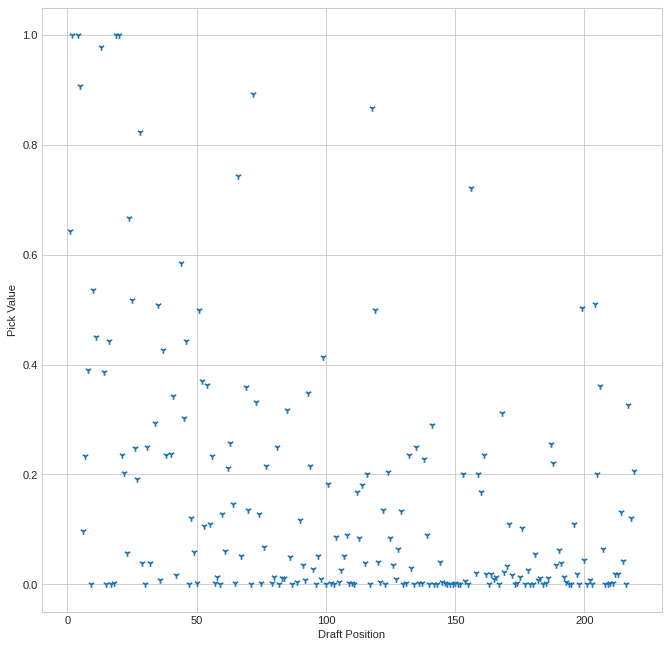

In [39]:
print(updatedGoalieNormalized)
print(xGoalieList)
figure(figsize=(10, 10), dpi=80)
plt.scatter(xGoalieList[0:210],updatedGoalieNormalized[0:210],marker="1")
plt.xlabel('Draft Position')
plt.ylabel('Pick Value')

In [40]:
print(xList[0:210])
print(updatedNormalized[0:210])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
[1.0, 0.8479348019959285, 0.5994522731459614, 0.602205742

With Point Shares data for all positions, forwards, goalies, and defenseman, we use a minimization function for Sum of Squared Errors to determine the appropriate Weibull Distribution parameters to model the data

In [42]:
import statistics
def equationDraftValue(lamb,beta,pickNumber): #Determines the draft pick value given a draft pick number and values for lambda and beta
  return math.exp(-lamb*((pickNumber-1)**beta))

def averageError(lamb, beta, pickNumberList, normalizedValueList): #Determines average Sum of Squared Errors for the parameters lambda and beta
  pError=[]
  for i in range(len(pickNumberList)):
    checkVal=(equationDraftValue(lamb,beta,pickNumberList[i])-normalizedValueList[i])**2
    pError.append(checkVal)
  return statistics.mean(pError)


#SSE Minimization Function
minVal=10000000
lambVal=0.1 #Starting Lambda Value
betaVal=0.3 #Starting Beta Value
while lambVal<0.50: #Lambda Limits determined using the parameters found in Thaler and Massey's paper
  betaVal=0.3
  while betaVal<0.7: #Beta Limits determined using the parameters found in Thaler and Massey's paper
    temp=averageError(lambVal, betaVal, xList[0:210], updatedNormalized[0:210])
    if isinstance(temp, complex)==False:
      if temp<minVal:
        minVal=temp
        storedLamb=lambVal
        storedBeta=betaVal
    betaVal+=0.001 #increment of beta up until limit for a set value of lambda
  lambVal+=0.001
print(storedLamb)
print(storedBeta)



0.42000000000000026
0.39100000000000007


In [43]:
print(temp) #temp is the minimum Sum of Squared Errors

0.015784426635824623


Plot the normalized Point Shares for all positions along with the Weibull Distribution with the estimated parameters to visualize the proposed model

0.880236387177607


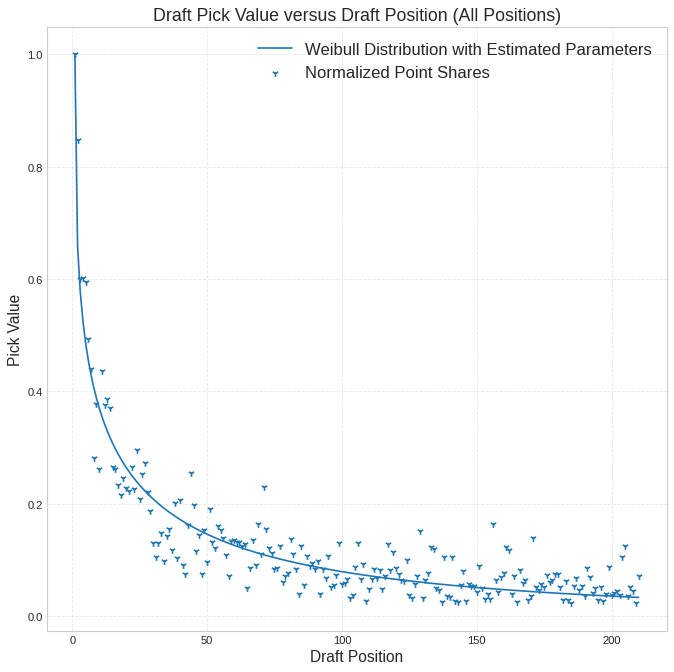

In [45]:
figure(figsize=(10, 10), dpi=80)
x=np.array(range(1,211))
y=[]
for i in x:
  y.append(math.exp(-storedLamb*((i-1)**storedBeta))) #Creates a graph of the draft value for each possible draft pick
plt.style.use('seaborn-whitegrid')
plt.plot(x,y)
plt.grid(alpha=.4,linestyle='--')
plt.scatter(xList[0:210],updatedNormalized[0:210],marker="1")
plt.title('Draft Pick Value versus Draft Position (All Positions)', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Weibull Distribution with Estimated Parameters','Normalized Point Shares'], prop={"size":15})
r2score= r2_score(y,updatedNormalized[0:210]) #R^2 value for the model
plt.savefig('All_Positions.png')
print(r2score)

Repeat Minimization of SSE for forwards

In [46]:
minForwardVal=10000000
lambVal=0.1
betaVal=0.3
storedForwardLamb=0
storedForwardBeta=0
while lambVal<0.50:
  betaVal=0.3
  while betaVal<0.7:
    temp=averageError(lambVal, betaVal, xForwardList[0:210], updatedForwardNormalized[0:210])
    if isinstance(temp, complex)==False:
      if temp<minForwardVal:
        minForwardVal=temp
        storedForwardLamb=lambVal
        storedForwardBeta=betaVal
    betaVal+=0.001
  lambVal+=0.001
print(storedForwardLamb)
print(storedForwardBeta)

0.4340000000000003
0.4040000000000001


Plot Point Shares model for forwards

0.012809173799101292
0.8304348503373676


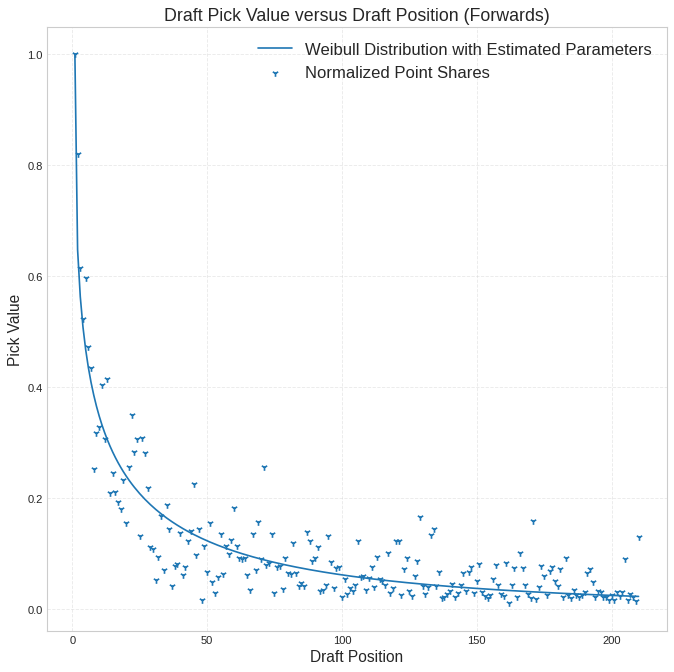

In [47]:
print(temp)
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

figure(figsize=(10, 10), dpi=80)
x=np.array(range(1,211))
y=[]
for i in x:
  y.append(math.exp(-storedForwardLamb*((i-1)**storedForwardBeta)))
plt.style.use('seaborn-whitegrid')
plt.plot(x,y)
plt.scatter(xForwardList[0:210],updatedForwardNormalized[0:210],marker="1")
plt.title('Draft Pick Value versus Draft Position (Forwards)', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Weibull Distribution with Estimated Parameters','Normalized Point Shares'], prop={"size":15})
r2score= r2_score(y,updatedForwardNormalized[0:210])
plt.savefig('Forwards.png')
print(r2score)
plt.grid(alpha=.4,linestyle='--')


Repeat Minimization of SSE for defenseman

In [48]:
minDefenceVal=10000000
lambVal=0.1
betaVal=0.3
while lambVal<0.50:
  betaVal=0.3
  while betaVal<0.7:
    temp=averageError(lambVal, betaVal, xDefenceList[0:210], updatedDefenceNormalized[0:210])
    if isinstance(temp, complex)==False:
      if temp<minDefenceVal:
        minDefenceVal=temp
        storedDefenceLamb=lambVal
        storedDefenceBeta=betaVal
    betaVal+=0.001
  lambVal+=0.001
print(storedDefenceLamb)
print(storedDefenceBeta)

0.31800000000000017
0.4430000000000001


Plot Point Shares model for defensemen

0.02851173996588795
0.6670254106096021


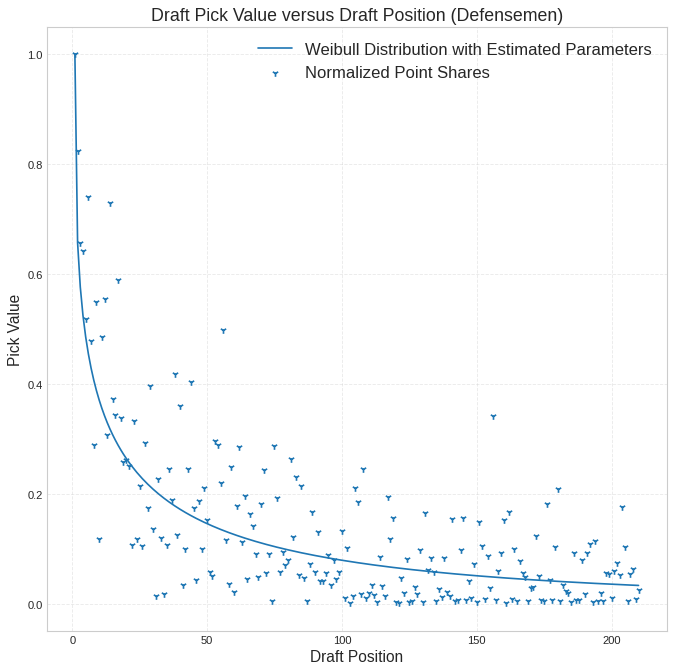

In [49]:
print(temp)
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

figure(figsize=(10, 10), dpi=80)
x=np.array(range(1,211))
y=[]
for i in x:
  y.append(math.exp(-storedLamb*((i-1)**storedBeta)))
plt.style.use('seaborn-whitegrid')
plt.plot(x,y)
plt.grid(alpha=.4,linestyle='--')
plt.scatter(xDefenceList[0:210],updatedDefenceNormalized[0:210],marker="1")
plt.title('Draft Pick Value versus Draft Position (Defensemen)', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Weibull Distribution with Estimated Parameters','Normalized Point Shares'], prop={"size":15})
r2score=r2_score(updatedDefenceNormalized[0:210],y)
print(r2score)
plt.savefig('Defence.png')

Repeat Minimization of SSE for goalies

In [50]:
minGoalieVal=10000000
lambVal=0.1
betaVal=0.3
while lambVal<0.50:
  betaVal=0.3
  while betaVal<0.7:
    temp=averageError(lambVal, betaVal, xGoalieList[0:210], updatedGoalieNormalized[0:210])
    if isinstance(temp, complex)==False:
      if temp<minGoalieVal:
        minGoalieVal=temp
        storedGoalieLamb=lambVal
        storedGoalieBeta=betaVal
    betaVal+=0.001
  lambVal+=0.001
print(storedGoalieLamb)
print(storedGoalieBeta)

0.29600000000000015
0.4270000000000001


Plot Point Shares Model for goalies

0.06600565743705525
-1.7283920589748183


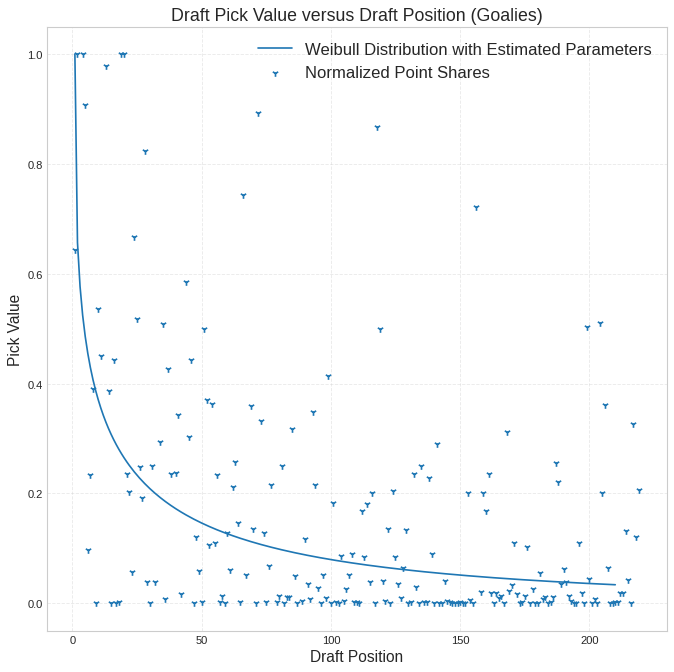

In [51]:
print(temp)
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

figure(figsize=(10, 10), dpi=80)
x=np.array(range(1,211))
y=[]
for i in x:
  y.append(math.exp(-storedLamb*((i-1)**storedBeta)))
plt.style.use('seaborn-whitegrid')
plt.plot(x,y)
plt.grid(alpha=.4,linestyle='--')
plt.scatter(xGoalieList[0:210],updatedGoalieNormalized[0:210],marker="1")
plt.title('Draft Pick Value versus Draft Position (Goalies)', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Weibull Distribution with Estimated Parameters','Normalized Point Shares'], prop={"size":15})
r2score= r2_score(y,updatedGoalieNormalized[0:210])
plt.savefig('Goalies.png')
print(r2score)

In [52]:
print(storedLamb,storedBeta)

0.42000000000000026 0.39100000000000007


Plotting Point Shares model for all positions and Draft Trades Model on same plot and Point Shares Model for forwards, defensemen, goalies, and all positions on same plot

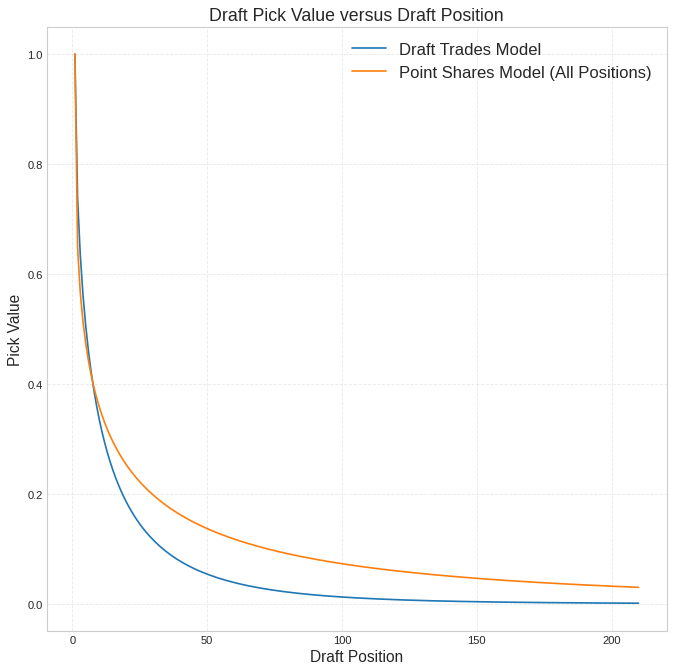

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

figure(figsize=(10, 10), dpi=80)
x=np.array(range(1,211))
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
oneLamb=0.304 #lambda and beta values found for draft trades model, point shares for all positions, forwards, defensemen and goalies
twoLamb=0.434
threeLamb=0.434
fourLamb=0.318
fiveLamb= 0.296
oneBeta=0.581
twoBeta=0.391
threeBeta=0.404
fourBeta=0.443
fiveBeta=0.427
for i in x:
  y1.append(math.exp(-oneLamb*((i-1)**oneBeta)))
  y2.append(math.exp(-twoLamb*((i-1)**twoBeta)))
  y3.append(math.exp(-threeLamb*((i-1)**threeBeta)))
  y4.append(math.exp(-fourLamb*((i-1)**fourBeta)))
  y5.append(math.exp(-fiveLamb*((i-1)**fiveBeta)))
plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)
plt.style.use('seaborn-whitegrid')
plt.title('Draft Pick Value versus Draft Position', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Draft Trades Model','Point Shares Model (All Positions)',], prop={"size":15})
plt.grid(alpha=.4,linestyle='--')
plt.savefig('Comparison.png')

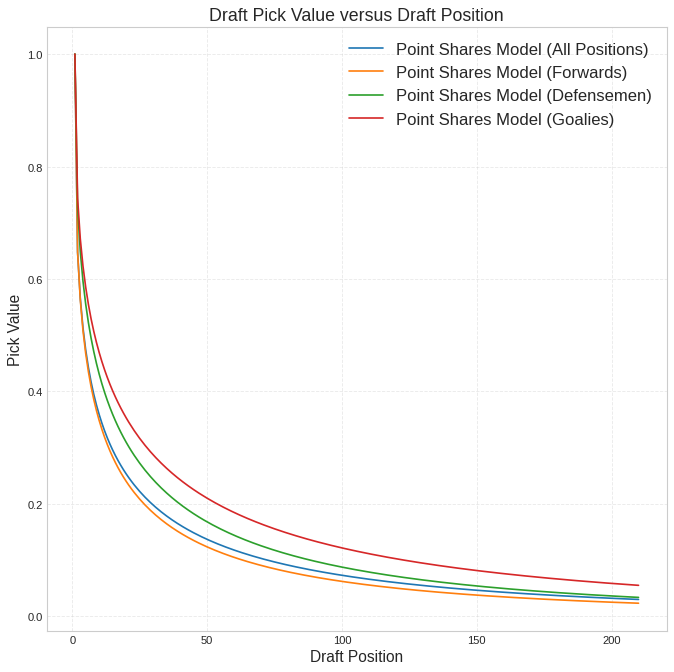

In [54]:
figure(figsize=(10, 10), dpi=80)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.style.use('seaborn-whitegrid')
plt.title('Draft Pick Value versus Draft Position', fontsize=16)
plt.xlabel('Draft Position', fontsize=14)
plt.ylabel('Pick Value', fontsize=14)
plt.legend(['Point Shares Model (All Positions)','Point Shares Model (Forwards)','Point Shares Model (Defensemen)','Point Shares Model (Goalies)'], prop={"size":15})
plt.grid(alpha=.4,linestyle='--')
plt.savefig('Comparison2.png')